## Predicting Credit Card Behavior in United States using NFCS Data

## Introduction and Background

## Data Description


This short paper will help to predict the credit card behavior based on demographic and household characteristics in the United States. Demographic indicators such as age, gender, marital status, financial literacy, education and profession along with household characteristics such as household income state and region of residence will be used to predict the credit card behavior. These variables play might play crucial role in determining the credit card behavior of any individual. This result of this analysis might be useful for banks and other financial institutions as well as for Government to devise credit policy in the different regions based on the credit card behavior of the population.


## Problem Statement

Individuals are different and exhibit diverse behaviors, however a general prediction model could be used to asses one's behavior. Global financial crisis of 2007-2008 is greatly considered as a result of subprime mortgage loans in the United States. In addition, a huge amount of credit card payments goes pending every month in the US. While credit card debt has increase around 32% in the last five years. Therefore, to avoid future banking crisis, it is important to devise a mechanism that can predict the credit card behavior of the potential user.

## Data Description

In this research I will use an open source dataset 'The National Financial Capability Study' (NFCS) provided by FINRA. This dataset is a primary data collected from the US citizens with an interval of three years. The first round of survey was conducted in the year of 2009 following the Global financial turmoil. Later on, second round was conducted in 2012, third in 2015 and most recent survey was conducted in 2018. More detail of the dataset can be found [here](https://www.usfinancialcapability.org/) and can be downloaded [here](https://www.usfinancialcapability.org/downloads.php). This dataset includes a wide range of financial, demographic and professional indicators of American Citizens from all the regions and states.

In [1]:
##Importing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
path ='/Users/rizwanmushtaq/Desktop/Data_Science/Python_Tutorial/NFCS2018_09_19.csv'


In [3]:
df1 = pd.read_csv(path, dtype= 'unicode', decimal=',')


In [4]:
df1.head()

,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,...,M21_4,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018,2018010001,48,9,4,2,5,11,1,5,...,,1,3,98,98,98,1,0.68368306,0.51964208,1.09518877
1,2018,2018010002,10,5,3,2,2,8,1,6,...,,1,3,98,3,1,98,0.80835753,2.51684077,0.92269329
2,2018,2018010003,44,7,3,2,2,8,1,6,...,,1,1,98,98,1,98,1.02155141,1.89619186,0.67109295
3,2018,2018010004,10,5,3,2,1,7,1,6,...,,98,98,4,4,2,98,0.80835753,2.51684077,0.92269329
4,2018,2018010005,13,8,4,1,2,2,1,6,...,,1,3,98,2,1,98,0.4480747,0.61473322,1.23222123


In [5]:
df1['J32'].value_counts()

      53655
5     24438
4      9890
3      8837
2      6311
98     2611
1      2197
99      371
Name: J32, dtype: int64

In [6]:
#Renaming required columns
df2 = df1.rename(columns={'A3':'gender','A3Ar_w':'agegrp', "A3B":"agegen",'A4A_new_w': "ethn", 'A5_2015':'edu' , 'A6':'marital' ,  'A7':'living',
     'A7A':'maritalvar',  'A8':'hhincome' ,  'AM31':'retired' ,
     'A9':'prof',  'A10':'profspouse', 'A21_2015':'ptimestudent',
     'A22_2015':'currentstudent',  'M6':'interest', 'M7':'inflation',  'M8':'bond',  'M31':'cinterest', 'M9':'mortgage', 'M10':'risk',
     'J1':'finsatisfacton',  'J2':'willingrisk', 'J3':'spendingincome',  'J5':'savingunforseen',  'J6':'savingchildedu',
     'J32':'creditrecord', 'B14':'invest',  'E7':'homemort',  'E15_2015':'mortpayment',
    'F2_1':'creditcardpayment', 'F2_3':'minpayment', 'F2_4':'latefee' ,'F2_5': 'limitfee' , 'G20':'unpaidbil' ,
    'G25_2':'paydayloan' , 'G23':'toomuchdebt','M20': 'fineducschool' ,
     'M21_1':'fineduchschool' ,
    'M1_1':'finconfdaytoday' , 'M1_2':'finconf_math' ,  'A14':'mostknowledge' ,  'J20':'howconfident'}, errors="raise")


In [7]:
#Selecting required columns
df3 = df2[['gender','agegrp', 'ethn', 'edu', 'marital', 'hhincome', 'retired',
     'prof', 'profspouse','ptimestudent','currentstudent',  
     'finsatisfacton',  'willingrisk', 'spendingincome', 'savingunforseen', 'savingchildedu',
     'creditrecord', 'invest',  'homemort',  'mortpayment',
    'creditcardpayment', 'minpayment', 'latefee', 'limitfee', 'unpaidbil',
    'paydayloan', 'toomuchdebt', 'fineducschool',
    'finconfdaytoday', 'finconf_math',  'mostknowledge',  'howconfident',
    'interest', 'inflation', 'bond', 'cinterest', 'mortgage', 'risk']]

In [8]:
##Replacing 99 and 98 with nan
df3 = df3.replace('99', np.nan)
df3 = df3.replace('98', np.nan)

In [9]:
#explore the number of columns and rows in the data
df3.head()
df3.shape

(108310, 38)

In [10]:
#To see whether there are missing values in the data
df3.isnull()

,gender,agegrp,ethn,edu,marital,hhincome,retired,prof,profspouse,ptimestudent,...,finconfdaytoday,finconf_math,mostknowledge,howconfident,interest,inflation,bond,cinterest,mortgage,risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,True
108306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
108307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [11]:
rows_before = df3.shape[0]
df3 = df3.dropna()
rows_after = df3.shape[0]

In [12]:
rows_before - rows_after

71748

In [13]:
#check again for missing values
df3.isnull()

,gender,agegrp,ethn,edu,marital,hhincome,retired,prof,profspouse,ptimestudent,...,finconfdaytoday,finconf_math,mostknowledge,howconfident,interest,inflation,bond,cinterest,mortgage,risk
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108293,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
##Converting and preparing variables for analysis
df3['inter'] = df3['interest'].replace(['2', '3'], '0')
df3['infl'] = df3['inflation'].replace(['1', '2'], '0')
df3['infl'] = df3['infl'].replace(['3'], '1')
df3['bnd'] = df3['bond'].replace(['1', '3', '4'], '0')
df3['bnd'] = df3['bnd'].replace(['2'], '1')
df3['mort'] = df3['mortgage'].replace(['2'], '0')
df3['mort'] = df3['mort'].replace(['2'], '1')
df3['cinter'] = df3['cinterest'].replace(['1', '3', '4', ' '], '0')
df3['cinter'] = df3['cinter'].replace(['2'], '1')
df3['rsk'] = df3['risk'].replace(['1'], '0')
df3['rsk'] = df3['rsk'].replace(['2'], '1')

In [15]:
df3['rsk'] = pd.to_numeric(df3['rsk'])
df3['inter'] = pd.to_numeric(df3['inter'])
df3['infl'] = pd.to_numeric(df3['infl'])
df3['cinter'] = pd.to_numeric(df3['cinter'])
df3['bnd'] = pd.to_numeric(df3['bnd'])
df3['mort'] = pd.to_numeric(df3['mort'])

In [16]:
fl  = df3['rsk'] + df3['mort'] + df3['cinter'] + df3['bnd'] + df3['infl'] + df3['inter']
df3['fl'] = fl

In [17]:
df3['credit'] = pd.to_numeric(df3['creditrecord'], errors='coerce').fillna(0).astype(int)

In [18]:
df3['credit'].mean()

1.9544882665062087

In [19]:
##computing Target variable
df3['credit_bin'] = df3['credit'].apply(lambda x: 1 if x >= 2 else 0)

In [20]:
df3['credit_bin'].value_counts()

0    20205
1    16357
Name: credit_bin, dtype: int64

In [24]:
#df3['censusreg'] = pd.to_numeric(df3['censusreg'], errors='coerce')
df3['gender'] = pd.to_numeric(df3['gender'])
df3['agegrp'] = pd.to_numeric(df3['agegrp'])
df3['ethn'] = pd.to_numeric(df3['ethn'])
df3['edu'] = pd.to_numeric(df3['edu'], errors='coerce').fillna(0).astype(int)
df3['marital'] = pd.to_numeric(df3['marital'])
df3['hhincome'] = pd.to_numeric(df3['hhincome'])
#df3['armservice'] = pd.to_numeric(df3['armservice'], errors='coerce').fillna(0).astype(int)
df3['retired'] = pd.to_numeric(df3['retired'], errors='coerce').fillna(0).astype(int)
df3['prof'] = pd.to_numeric(df3['prof'])
df3['profspouse'] = pd.to_numeric(df3['profspouse'], errors='coerce').fillna(0).astype(int)
df3['currentstudent'] = pd.to_numeric(df3['currentstudent'], errors='coerce').fillna(0).astype(int)
df3['finsatisfacton'] = pd.to_numeric(df3['finsatisfacton'])
df3['willingrisk'] = pd.to_numeric(df3['willingrisk'])
df3['savingchildedu'] = pd.to_numeric(df3['savingchildedu'], errors='coerce').fillna(0).astype(int)
df3['finconfdaytoday'] = pd.to_numeric(df3['finconfdaytoday'])
#df3['usstate'] = pd.to_numeric(df3['usstate'])
#df3['censusdiv'] = pd.to_numeric(df3['censusdiv'])
#df3['censusreg'] = pd.to_numeric(df3['censusreg'])

In [27]:
##computing features
Features = df3[['gender','agegrp','ethn', 'edu', 'marital', 'hhincome', 'retired','prof',
               'profspouse','currentstudent', 'finsatisfacton', 'willingrisk', 'savingchildedu','finconfdaytoday','fl']]

In [28]:
X = StandardScaler().fit(Features).transform(Features)
X

array([[ 1.23780847, -1.92606083, -0.54719996, ...,  1.81045508,
        -3.01708704, -0.24856366],
       [-0.80787943, -1.27963819, -0.54719996, ...,  0.54771956,
         0.66423238, -2.0069045 ],
       [ 1.23780847,  1.30605237, -0.54719996, ..., -0.71501596,
         0.66423238, -0.24856366],
       ...,
       [ 1.23780847,  1.30605237, -0.54719996, ..., -0.71501596,
        -3.75335093,  0.63060676],
       [ 1.23780847,  1.30605237, -0.54719996, ..., -0.71501596,
        -1.54455927, -0.24856366],
       [ 1.23780847,  1.30605237, -0.54719996, ..., -0.71501596,
         0.66423238,  0.63060676]])

In [29]:
y = df3['credit_bin'].values

## Mosaic plots (Exploring Data/Association between variables)

## Question: Are financial literacy and credit card behavior associated ?

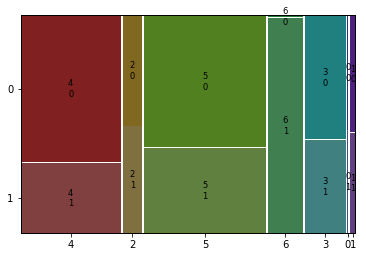

In [76]:
##Mosaic plots
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

mosaic(df3, ['fl', 'credit_bin'])
plt.show()

## Question: Does age group of the individual determine credit card behavior ?


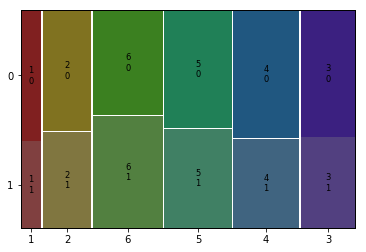

In [75]:
mosaic(df3, ['agegrp', 'credit_bin'])
plt.show()

## OLS Regression (Supervised Learning)

In [31]:
##OLS REGRESSION
y1 = df3['credit'].values
model = sm.OLS(y1, X)

In [32]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.465
Method:                 Least Squares   F-statistic:                              2116.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                        0.00
Time:                        11:26:04   Log-Likelihood:                         -80350.
No. Observations:               36562   AIC:                                  1.607e+05
Df Residuals:                   36547   BIC:                                  1.609e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Logistic Resgression (Supervised Learning)

In [73]:
#LOGIT REGRESSION
import statsmodels.api as sm
logit_model=sm.Logit(y,Features)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.102938
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.850    
Dependent Variable: y                AIC:              7557.2099
Date:               2021-02-16 11:47 BIC:              7684.8113
No. Observations:   36562            Log-Likelihood:   -3763.6  
Df Model:           14               LL-Null:          -25140.  
Df Residuals:       36547            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
gender          -0.1469   0.0636  -2.3110 0.0208 -0.2714 -0.0223
agegrp          -0.0403   0.0279  -1.4467 0.1480 -0.0950  0.0143
ethn         

## KNN Clustering (Un-Supervised Learning)

In [33]:
#here we split the data sets into test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29249, 15) (29249,)
Test set: (7313, 15) (7313,)


In [34]:
#In order to apply KNN we need to import library
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [36]:
yhat = knn.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 1])

In [37]:
#now we test the accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9597251188074806
Test set Accuracy:  0.9453028852728018


In [38]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [39]:
centers = model.cluster_centers_
centers

array([[ 1.94375565e-01,  8.74203751e-01, -3.34353108e-01,
        -5.96219097e-01, -5.49197703e-01, -4.22054535e-01,
        -2.66818344e-01,  9.48068876e-01,  1.21173491e+00,
        -1.63111174e-01, -5.26707388e-01, -9.52829089e-01,
        -5.80733411e-01,  1.52510803e-01, -1.69094403e-01],
       [-1.74609001e-01, -1.05655740e-01, -5.47199963e-01,
         1.31888878e+00, -2.98055276e-01,  6.40269161e-01,
        -2.11110269e-01, -6.23749665e-01, -2.20596216e-01,
        -1.58049636e-01,  3.34509458e-01,  3.68175218e-01,
         1.97979383e-02,  2.62825453e-01,  7.37541387e-01],
       [-5.70002509e-02, -1.28889760e+00,  6.49709542e-01,
         5.31201884e-01,  4.50892213e-02, -4.39076679e-01,
        -4.21786399e-02, -3.66777595e-01, -5.55149206e-01,
         5.04289557e+00,  4.73883832e-01,  7.55909806e-01,
         8.19657260e-02, -5.35754728e-02, -9.77401447e-01],
       [ 3.91199686e-01,  8.28666568e-01, -2.22900812e-01,
        -1.23715038e-01,  2.15420107e+00, -7.16884725

In [40]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [41]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [42]:
P = pd_centers(Features, centers)
P

,gender,agegrp,ethn,edu,marital,hhincome,retired,prof,profspouse,currentstudent,finsatisfacton,willingrisk,savingchildedu,finconfdaytoday,fl,prediction
0,0.194376,0.874204,-0.334353,-0.596219,-0.549198,-0.422055,-0.266818,0.948069,1.211735,-0.163111,-0.526707,-0.952829,-0.580733,0.152511,-0.169094,0
1,-0.174609,-0.105656,-0.547200,1.318889,-0.298055,0.640269,-0.211110,-0.623750,-0.220596,-0.158050,0.334509,0.368175,0.019798,0.262825,0.737541,1
2,-0.057000,-1.288898,0.649710,0.531202,0.045089,-0.439077,-0.042179,-0.366778,-0.555149,5.042896,0.473884,0.755910,0.081966,-0.053575,-0.977401,2
3,0.391200,0.828667,-0.222901,-0.123715,2.154201,-0.716885,-0.238556,0.677121,-0.870389,-0.160172,-0.148711,-0.447566,-0.479958,0.236751,0.028095,3
4,-0.647799,0.715800,-0.149329,0.988837,-0.093073,0.146839,3.813872,0.504555,0.457845,-0.135941,0.335589,0.010202,-0.271876,0.245025,0.458825,4
5,0.000662,1.093724,-0.379001,0.288132,-0.567621,0.485905,-0.170785,1.361465,1.582585,-0.163111,0.835106,0.020165,-0.559692,0.450061,0.518660,5
6,0.091453,-0.270300,0.072229,-0.416547,0.026795,-0.257559,-0.237421,-0.136512,-0.175099,-0.146470,-0.568952,-0.223069,0.129228,-2.932800,-0.361620,6
7,-0.043354,-0.401325,1.827486,0.158901,-0.179954,0.434357,-0.230270,-0.591164,-0.276675,-0.163111,0.152985,0.380209,0.138296,0.171991,0.260638,7
8,-0.035747,-0.971775,0.213960,-0.490849,0.266743,-1.275475,-0.272098,-0.079040,-0.743819,-0.160641,-0.904322,-0.435959,-0.636536,-0.207510,-0.361837,8
9,0.053879,-1.013574,0.558692,0.252122,-0.154845,-0.174248,-0.170875,-0.491990,-0.372716,-0.163111,0.858684,1.039360,0.392165,0.019735,-1.881187,9


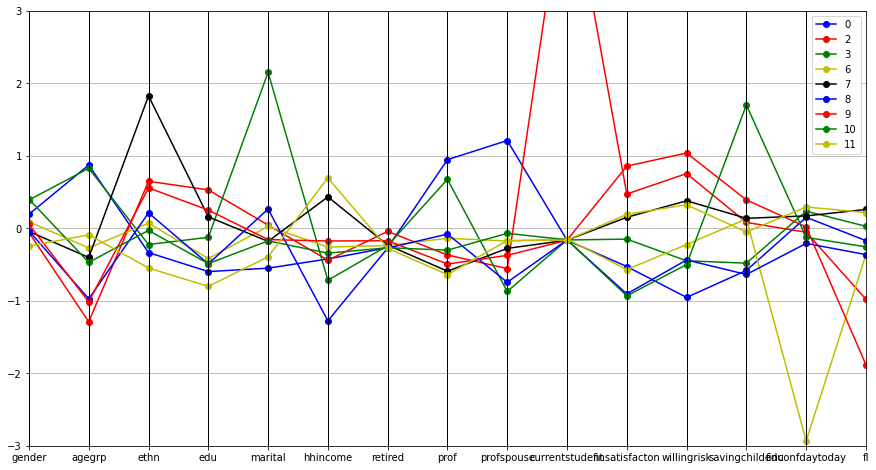

In [83]:
parallel_plot(P[P['fl'] < 0.4])
#parallel_plot(P[(P['fl'] > 0.5) & (df3['prof'] > 0.4)])


## Ploting Confusion Matrix

In [51]:
#function imported from the course
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2910  341]
 [  59 4003]]


Confusion matrix, without normalization
[[2910  341]
 [  59 4003]]


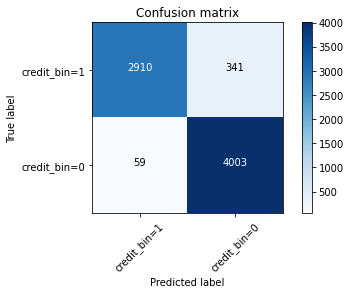

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['credit_bin=1','credit_bin=0'],normalize= False,  title='Confusion matrix')

## Doing Neural Network Analysis to predict credit card behavior ( Deep Learning)

In [53]:
# Import Scikit-Learn model
from sklearn.neural_network import MLPClassifier

In [55]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop


In [57]:
# Specify an activation function
mlp = MLPClassifier(hidden_layer_sizes=(5,2), activation= 'logistic')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [59]:
# Fit and predict data (similar to approach for other sklearn models)
mlp.fit(X_train, y_train)
mlp.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

In [60]:
np.mean(y), np.mean(1-y)

(0.4473770581478037, 0.5526229418521963)

In [61]:
### BEGIN SOLUTION
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [62]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.988
roc-auc is 0.996


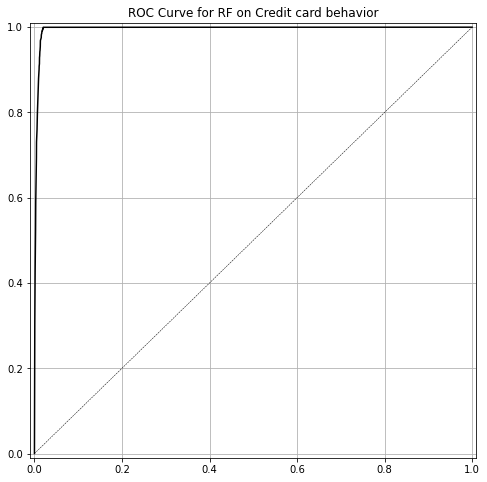

In [63]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Credit card behavior'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')
### END SOLUTION

In [64]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [65]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Like we did for the Random Forest, we generate two kinds of predictions
# One is a hard decision, the other is a probabilitistic score.

#y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
#y_pred_prob_nn_1 = model_1.predict(X_test_norm)